In [ ]:
# Databricks notebook source
# MAGIC %md This notebook sets up the companion cluster(s) to run the solution accelerator. It also creates the Workflow to illustrate the order of execution. Happy exploring! 
# MAGIC 🎉
# MAGIC 
# MAGIC **Steps**
# MAGIC 1. Simply attach this notebook to a cluster and hit Run-All for this notebook. A multi-step job and the clusters used in the job will be created for you and hyperlinks are printed on the last block of the notebook. 
# MAGIC 
# MAGIC 2. Run the accelerator notebooks: Feel free to explore the multi-step job page and **run the Workflow**, or **run the notebooks interactively** with the cluster to see how this solution accelerator executes. 
# MAGIC 
# MAGIC     2a. **Run the Workflow**: Navigate to the Workflow link and hit the `Run Now` 💥. 
# MAGIC   
# MAGIC     2b. **Run the notebooks interactively**: Attach the notebook with the cluster(s) created and execute as described in the `job_json['tasks']` below.
# MAGIC 
# MAGIC **Prerequisites** 
# MAGIC 1. You need to have cluster creation permissions in this workspace.
# MAGIC 
# MAGIC 2. In case the environment has cluster-policies that interfere with automated deployment, you may need to manually create the cluster in accordance with the workspace cluster policy. The `job_json` definition below still provides valuable information about the configuration these series of notebooks should run with. 
# MAGIC 
# MAGIC **Notes**
# MAGIC 1. The pipelines, workflows and clusters created in this script are not user-specific. Keep in mind that rerunning this script again after modification resets them for other users too.
# MAGIC 
# MAGIC 2. If the job execution fails, please confirm that you have set up other environment dependencies as specified in the accelerator notebooks. Accelerators may require the user to set up additional cloud infra or secrets to manage credentials. 

# For DBFS loading the sample CSV file
#df = spark.read.format('csv').options(header='true', inferSchema='true').load('dbfs:/FileStore/csv/demo_database_mart_machine_finding_preview_2023_06_02_2.csv')
df = spark.read.format('csv').options(header='true', inferSchema='true').load('dbfs:/FileStore/csv/mart_machine_finding.csv')
nist_df = spark.read.format('csv').options(header='true', inferSchema='true').load('dbfs:/FileStore/csv/nist_nvd.csv')
cisa_df = spark.read.format('csv').options(header='true', inferSchema='true').load('dbfs:/FileStore/csv/cisa_data.csv')

In [ ]:
# Exploratory data analysis:
# Now, let's look at the data. We can display the DataFrame to view the data in a tabular format:
display(df)

_dbt_source_relation ss_id prev_ss_id organization_id connector_type asset_type asset_id import_time asset_hostname asset_operating_systems asset_ipv4 asset_device_type vuln_cves vuln_cvss3_base_score vuln_cvss_base_score vuln_description vuln_exploit_available vuln_risk_factor vuln_name vuln_port vuln_id vuln_remediation vuln_severity finding_priority severity_modification_type first_seen_at last_seen_at finding_state asset_operating_system_version asset_fqdn finding_url location_url vuln_labels """production"".""org_demo_env"".""stg_tenable_asset_vuln""" tenable-vm_vulns:168982-68899602-55c0-492e-b087-7ca7c894d3fb:tenable-vm_assets:68899602-55c0-492e-b087-7ca7c894d3fb 68899602-55c0-492e-b087-7ca7c894d3fb:168982 demo_env tenable-vm machine 68899602-55c0-492e-b087-7ca7c894d3fb 2023-06-13T15:31:19.453+0000 ip-172-31-18-222 "[""Linux Kernel 4.14.287-148.504.amzn1.x86_64 on Amazon Linux AMI""]" 172.31.18.222 aws-ec2-instance null null null This Tenable product detected files or paths on the scanned Unix-like system which contain characters with command injection or privilege escalation potential. Although almost any character is valid for an entry in this kind of filesystem, such as semicolons, use of some of them may lead to problems or security compromise when used in further commands.\n\nThis product has chosen in certain plugins to avoid digging within those files and directories for security reasons.\nThese should be renamed to avoid security compromise. false Info Filepaths contain Dangerous characters (Linux) 22 168982 Rename these files or folders to not include dangerous characters. info P4 NONE 2023-03-08 17:09:42.561 2023-05-04 16:10:31.527 closed null ip-172-31-18-222.us-west-1.compute.internal https://cloud.tenable.com/tio/app.html#/vulnerability-management/dashboard/vulnerabilities/by-plugins/vulnerability-details/168982/assets_affected/asset-details/68899602-55c0-492e-b087-7ca7c894d3fb/activity null null """production"".""org_demo_env"".""stg_tenable_asset_vuln""" tenable-vm_vulns:171410-68899602-55c0-492e-b087-7ca7c894d3fb:tenable-vm_assets:68899602-55c0-492e-b087-7ca7c894d3fb 68899602-55c0-492e-b087-7ca7c894d3fb:171410 demo_env tenable-vm machine 68899602-55c0-492e-b087-7ca7c894d3fb 2023-06-01T10:01:35.796+0000 i-0ba626a6d4203bdcd "[""Linux Kernel 4.14.287-148.504.amzn1.x86_64 on Amazon Linux AMI""]" null general-purpose null 0.0 0.0 Enumerates the IP address assignment method(static/dynamic). false None IP Assignment Method Detection 0 171410 N/A info P4 NONE 2023-02-15 17:09:21.356 2023-05-31 16:10:52.818 open null i-0ba626a6d4203bdcd https://cloud.tenable.com/tio/app.html#/vulnerability-management/dashboard/vulnerabilities/by-plugins/vulnerability-details/171410/assets_affected/asset-details/68899602-55c0-492e-b087-7ca7c894d3fb/activity null null """production"".""org_demo_env"".""stg_tenable_asset_vuln""" tenable-vm_vulns:95928-68899602-55c0-492e-b087-7ca7c894d3fb:tenable-vm_assets:68899602-55c0-492e-b087-7ca7c894d3fb 68899602-55c0-492e-b087-7ca7c894d3fb:95928 demo_env tenable-vm machine 68899602-55c0-492e-b087-7ca7c894d3fb 2023-06-01T10:01:35.796+0000 i-0ba626a6d4203bdcd "[""Linux Kernel 4.14.287-148.504.amzn1.x86_64 on Amazon Linux AMI""]" null general-purpose null 0.0 0.0 Using the supplied credentials, Nessus was able to enumerate the local users and groups on the remote host. false None Linux User List Enumeration 0 95928 None info P4 NONE 2022-05-26 16:09:39.714 2023-05-31 16:10:52.818 open null i-0ba626a6d4203bdcd https://cloud.tenable.com/tio/app.html#/vulnerability-management/dashboard/vulnerabilities/by-plugins/vulnerability-details/95928/assets_affected/asset-details/68899602-55c0-492e-b087-7ca7c894d3fb/activity null null """production"".""org_demo_env"".""stg_tenable_asset_vuln""" tenable-vm_vulns:117887-68899602-55c0-492e-b087-7ca7c894d3fb:tenable-vm_assets:68899602-55c0-492e-b087-7ca7c894d3fb 68899602-55c0-492e-b087-7ca7c894d3fb:117887 demo_env tenable-vm machine 68899602-55c0-492e-b087-7ca7c894

In [ ]:
# Basic statistical analysis
# Here's an example of counting the number of vulnerabilities of each severity:
# display(df.groupby('vuln_severity').count())

# List of severities to focus on
severities = ['critical', 'low', 'medium', 'high', 'null']

# Filter the DataFrame
df_filtered = df.filter(df.vuln_severity.isin(severities))

# Group by vuln_severity and count
df_grouped = df_filtered.groupby('vuln_severity').count()

# Display the result
display(df_grouped)

vuln_severity count critical 14 low 840 high 635 medium 1292 null 148

Databricks visualization. Run in Databricks to view.

In [ ]:
# To count the number of vulnerabilities by connector_type (integrations)
display(df.groupBy('connector_type').count())

connector_type count wiz 2941 tenable-vm 74

Databricks visualization. Run in Databricks to view.

In [ ]:
# ML Fun (to-do: fix this!)
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml import Pipeline

# Convert categorical variables into numerical format
indexer1 = StringIndexer(inputCol="connector_type", outputCol="connector_typeIndex")
indexer2 = StringIndexer(inputCol="asset_type", outputCol="asset_typeIndex")
indexer3 = StringIndexer(inputCol="vuln_severity", outputCol="label")  # Convert target variable

# Assemble features into a vector
assembler = VectorAssembler(inputCols=["connector_typeIndex", "asset_typeIndex"], outputCol="features")

# Define the classifier
classifier = RandomForestClassifier()

# Define the pipeline
pipeline = Pipeline(stages=[indexer1, indexer2, indexer3, assembler, classifier])

# Split data into training and testing
train, test = df.randomSplit([0.7, 0.3])

# Train the model
model = pipeline.fit(train)

# Make predictions
predictions = model.transform(test)

predictions.select("prediction", "label").show()


---------------------------------------------------------------------------
Py4JJavaError                             Traceback (most recent call last)
File <command-2929600151126725>:30
     27 # Make predictions
     28 predictions = model.transform(test)
---> 30 predictions.select("prediction", "label").show()

File /databricks/spark/python/pyspark/instrumentation_utils.py:48, in _wrap_function.<locals>.wrapper(*args, **kwargs)
     46 start = time.perf_counter()
     47 try:
---> 48     res = func(*args, **kwargs)
     49     logger.log_success(
     50         module_name, class_name, function_name, time.perf_counter() - start, signature
     51     )
     52     return res

File /databricks/spark/python/pyspark/sql/dataframe.py:923, in DataFrame.show(self, n, truncate, vertical)
    917     raise PySparkTypeError(
    918         error_class="NOT_BOOL",
    919         message_parameters={"arg_name": "vertical", "arg_type": type(vertical).__name__},
    920     )
    922 if isins

In [ ]:
# Vulnerability Analysis Report

This report provides an analysis of the vulnerabilities detected by different types of connectors in our system.

In [ ]:
# analyze the number and severity of vulnerabilities have changed over time
# extract the date from the timestamp fields first_seen_at and last_seen_at
# then aggregate the data by the extracted date

from pyspark.sql import functions as F

# Extract date from timestamp
df = df.withColumn("first_seen_date", F.to_date(F.col("first_seen_at")))

# Count vulnerabilities per day
vulnerabilities_per_day = df.groupBy("first_seen_date").count()

# Display results
display(vulnerabilities_per_day.orderBy("first_seen_date"))


first_seen_date count null 170 2021-05-05 4 2022-05-15 7 2022-05-26 29 2022-06-03 13 2022-06-26 4 2022-07-17 3 2022-07-22 1 2022-08-15 2 2022-08-30 4 2022-09-01 2 2022-09-09 1 2022-09-15 3 2022-09-19 4 2022-09-22 97 2022-10-03 1 2022-10-13 11 2022-10-19 37 2022-10-24 61 2022-10-28 2 2022-11-09 24 2022-11-11 2 2022-11-14 22 2022-11-22 3 2022-11-30 2 2022-12-07 20 2022-12-15 1 2022-12-19 14 2022-12-21 2 2022-12-22 1 2023-01-18 32 2023-01-20 2 2023-01-24 13 2023-01-26 1 2023-02-05 1 2023-02-08 11 2023-02-13 8 2023-02-15 1 2023-02-24 26 2023-03-02 4 2023-03-07 51 2023-03-08 1 2023-03-16 3 2023-03-19 32 2023-03-21 4 2023-03-22 1116 2023-03-24 12 2023-04-02 123 2023-04-05 10 2023-04-06 21 2023-04-09 30 2023-04-12 688 2023-04-15 1 2023-04-18 37 2023-04-19 1 2023-04-27 1 2023-04-30 1 2023-05-01 1 2023-05-08 55 2023-05-10 13 2023-05-16 9 2023-05-18 148 2023-05-22 11

Databricks visualization. Run in Databricks to view.

In [ ]:
 # Trend of vulnerability severity over time
 # perform a similar operation but group by both first_seen_date and vuln_severity:

severity_trends = df.groupBy("first_seen_date", "vuln_severity").count()

display(severity_trends.orderBy("first_seen_date", "vuln_severity"))

first_seen_date vuln_severity count null ""CVE-2022-36123"" 1 null ""CVE-2022-39842"" 1 null ""CVE-2023-0217"" 1 null Amazon Linux AMI : kernel (ALAS-2023-1701) 1 null Amazon Linux AMI : kernel (ALAS-2023-1706) 1 null Run 'yum update kernel' to update your system. 2 null false 1 null null 148 null yum update krb5-libs 1 null yum update nettle 1 null yum update perl-IO-Zlib 2 null yum update perl-Package-Constants 1 null yum update perl-Pod-Escapes 1 null yum update perl-libs 1 null yum update php-cli 2 null yum update rsync 1 null yum update sssd-common-pac 2 null yum update wpa_supplicant 1 null yum update zlib 1 2021-05-05 info 4 2022-05-15 high 5 2022-05-15 low 2 2022-05-26 info 29 2022-06-03 info 12 2022-06-03 medium 1 2022-06-26 high 2 2022-06-26 low 2 2022-07-17 high 2 2022-07-17 low 1 2022-07-22 info 1 2022-08-15 high 1 2022-08-15 low 1 2022-08-30 info 4 2022-09-01 info 2 2022-09-09 info 1 2022-09-15 high 3 2022-09-19 high 4 2022-09-22 high 4 2022-09-22 low 37 2022-09-22 medium 56 2022-10-03 high 1 2022-10-13 low 4 2022-10-13 medium 7 2022-10-19 high 16 2022-10-19 low 14 2022-10-19 medium 7 2022-10-24 low 19 2022-10-24 medium 42 2022-10-28 info 2 2022-11-09 low 10 2022-11-09 medium 14 2022-11-11 low 1 2022-11-11 medium 1 2022-11-14 high 9 2022-11-14 low 9 2022-11-14 medium 4 2022-11-22 info 3 2022-11-30 high 1 2022-11-30 medium 1 2022-12-07 low 6 2022-12-07 medium 14 2022-12-15 low 1 2022-12-19 high 8 2022-12-19 low 4 2022-12-19 medium 2 2022-12-21 high 1 2022-12-21 medium 1 2022-12-22 info 1 2023-01-18 high 15 2023-01-18 low 9 2023-01-18 medium 8 2023-01-20 info 2 2023-01-24 high 1 2023-01-24 low 4 2023-01-24 medium 8 2023-01-26 medium 1 2023-02-05 high 1 2023-02-08 low 2 2023-02-08 medium 9 2023-02-13 low 3 2023-02-13 medium 5 2023-02-15 info 1 2023-02-24 high 10 2023-02-24 low 11 2023-02-24 medium 5 2023-03-02 high 1 2023-03-02 low 2 2023-03-02 medium 1 2023-03-07 high 1 2023-03-07 low 17 2023-03-07 medium 33 2023-03-08 info 1 2023-03-16 high 3 2023-03-19 high 11 2023-03-19 low 13 2023-03-19 medium 8 2023-03-21 low 2 2023-03-21 medium 2 2023-03-22 high 159 2023-03-22 low 318 2023-03-22 medium 639 2023-03-24 low 4 2023-03-24 medium 8 2023-04-02 high 29 2023-04-02 low 44 2023-04-02 medium 50 2023-04-05 medium 10 2023-04-06 medium 21 2023-04-09 high 6 2023-04-09 low 9 2023-04-09 medium 15 2023-04-12 high 289 2023-04-12 low 218 2023-04-12 medium 181 2023-04-15 medium 1 2023-04-18 high 14 2023-04-18 low 15 2023-04-18 medium 8 2023-04-19 low 1 2023-04-27 info 1 2023-04-30 high 1 2023-05-01 high 1 2023-05-08 high 2 2023-05-08 medium 53 2023-05-10 high 7 2023-05-10 low 5 2023-05-10 medium 1 2023-05-16 high 5 2023-05-16 low 1 2023-05-16 medium 3 2023-05-18 critical 14 2023-05-18 high 17 2023-05-18 low 47 2023-05-18 medium 70 2023-05-22 high 5 2023-05-22 low 4 2023-05-22 medium 2

In [ ]:
# Find the most common vulnerabilities

# Count occurrences of each vulnerability name
vulnerability_counts = df.groupBy('vuln_name').count()

# Order by count in descending order
most_common_vulnerabilities = vulnerability_counts.orderBy(F.desc('count'))

# Display the result
display(most_common_vulnerabilities)


vuln_name count Windows Server 2012 R2 681 Windows Server 2019 249 kernel 196 null 162 linux-image-4.4.0-1118-aws 147 cpe:2.3:a:oracle:openjdk 104 cpe:2.3:a:oracle:jdk 75 php-cli 63 vim-common 45 vim-minimal 43 expat 39 vim-enhanced 38 vim-filesystem 32 vim-data 31 pkg:java/log4j:log4j 27 microcode_ctl 26 containerd.io 22 bind-libs 20 com.google.code.gson:gson 20 postgresql96 18 org.apache.httpcomponents:httpclient 18 grub2-tools-extra 18 samba-common-libs 18 grub2-efi-x64 18 bind-export-libs 17 commons-io:commons-io 17 samba-client 17 grub2-common 17 libwbclient 16 grub2-pc-modules 16 bind-utils 15 mod_ssl 15 grub2-tools 15 bind-libs-lite 14 samba-vfs-glusterfs 13 cpe:2.3:a:python:python 13 com.fasterxml.jackson.core:jackson-databind 13 openssl-libs 13 httpd 12 bind-license 12 grub2-tools-minimal 12 libsmbclient 12 openssl 11 grub2 11 xxd 11 samba-libs 11 python3 11 libwebp 11 grub2-pc 11 perl 10 perl-libs 10 grub2-efi-x64-modules 10 org.springframework:spring-core 10 samba 10 org.apache.logging.log4j:log4j-core 10 httpd-tools 9 samba-client-libs 9 io.netty:netty-codec-http 9 vim-tiny 9 samba-winbind-clients 9 org.yaml:snakeyaml 9 curl 8 glibc-common 8 samba-winbind-modules 8 perl-IO-Zlib 8 perl-Pod-Escapes 8 git 8 python-sssdconfig 7 perl-macros 7 net.minidev:json-smart 7 python-libs 7 samba-common 7 samba-winbind 7 zlib 7 com.google.protobuf:protobuf-java 7 krb5-libs 6 org.jsoup:jsoup 6 dhcp-common 6 libxml2-python 6 sssd-common 6 libsss_autofs 6 libsss_nss_idmap 6 openldap 5 org.apache.commons:commons-compress 5 cyrus-sasl-gssapi 5 sssd-ad 5 libsss_sudo 5 sssd-common-pac 5 libsss_certmap 5 systemd 5 libXpm 5 python 5 libipa_hbac 5 rpm-build 4 systemd-sysv 4 vim-runtime 4 libcurl 4 vim 4 sssd-ipa 4 golang.org/x/net 4 xrdp 4 glibc-headers 4 io.netty:netty-codec 3 cyrus-sasl-lib 3 HyperText Transfer Protocol (HTTP) Information 3 OpenSSL Installed (Linux) 3 Libgcrypt Installed (Linux/UNIX) 3 perl-Git 3 sssd-krb5 3 rpm-build-libs 3 Tenable Nessus Installed (Linux) 3 com.amazonaws:aws-java-sdk-s3 3 libldb 3 sssd-proxy 3 sssd-krb5-common 3 dbus-libs 3 dhclient 3 glibc-devel 2 com.h2database:h2 2 device-mapper-multipath 2 openssh-server 2 json5 2 nss-sysinit 2 org.apache.camel:camel-core 2 glibc-all-langpacks 2 Host Fully Qualified Domain Name (FQDN) Resolution 2 screen 2 rpm 2 systemd-libs 2 dhcp-libs 2 Medium 2 sssd-ldap 2 libxml2 2 nss-tools 2 libsmartcols 2 libfdisk 2 open-vm-tools 2 Asset Attribute: Fully Qualified Domain Name (FQDN) 2 freetype 2 org.bitbucket.b_c:jose4j 2 openssh 2 openssl-devel 2 libmount 2 Nessus Scan Information 2 wpa_supplicant 2 Inconsistent Hostname and IP Address 2 kpartx 2 libX11-common 2 glib2 2 ncurses 2 Microsoft .NET Framework 4.8 2 php 2 systemd-python 2 rsync 2 loader-utils 2 ICSharpCode SharpZipLib 2 Ethernet MAC Addresses 2 xz 1 org.apache.santuario:xmlsec 1 Time of Last System Startup 1 Target Credential Status by Authentication Protocol - Valid Credentials Provided 1 ""CVE-2023-0401""]" 1 SSL Certificate Cannot Be Trusted 1 libkadm5 1 org.apache.mina:mina-core 1 Common Platform Enumeration (CPE) 1 libtiff 1 sssd-client 1 Enumerate MAC Addresses via SSH 1 Network Time Protocol (NTP) Server Detection 1 cpe:2.3:a:google:chrome 1 unzip 1 Service Detection 1 aide 1 zlib-devel 1 libcom_err-devel 1 Filepaths contain Dangerous characters (Linux) 1 Patch Report 1 Amazon Linux AMI : kernel (ALAS-2023-1707) 1 Linux Mounted Devices 1 sudo 1 OS Identification and Installed Software Enumeration over SSH v2 (Using New SSH Library) 1 Target Credential Issues by Authentication Protocol - No Issues Found 1 golang.org/x/crypto 1 Enumerate IPv6 Interfaces via SSH 1 Amazon Web Services EC2 Instance Metadata Enumeration (Unix) 1 SSL Perfect Forward Secrecy Cipher Suites Supported 1 RPC Services Enumeration 1 glibc-minimal-langpack 1 SSL Certificate 'commonName' Mismatch 1 SQLite Local Detection (Linux) 1 libdb 1 glob-parent 1 4.6 1 pyldb 1 tar 1 Reachable IPv6 address 1 Additional DNS Hostnames 1 Enumerate IPv4 

In [ ]:
# Most common vulnerabilities for each connector_type (integration)

# Count occurrences of each vulnerability name for each connector type
vulnerability_counts_by_connector = df.groupBy('connector_type', 'vuln_name').count()

# Order by connector type and count in descending order
most_common_vulnerabilities_by_connector = vulnerability_counts_by_connector.orderBy('connector_type', F.desc('count'))

# Display the result
display(most_common_vulnerabilities_by_connector)


connector_type vuln_name count tenable-vm HyperText Transfer Protocol (HTTP) Information 3 tenable-vm OpenSSL Installed (Linux) 3 tenable-vm Libgcrypt Installed (Linux/UNIX) 3 tenable-vm Tenable Nessus Installed (Linux) 3 tenable-vm Inconsistent Hostname and IP Address 2 tenable-vm Medium 2 tenable-vm Asset Attribute: Fully Qualified Domain Name (FQDN) 2 tenable-vm Host Fully Qualified Domain Name (FQDN) Resolution 2 tenable-vm Ethernet MAC Addresses 2 tenable-vm Nessus Scan Information 2 tenable-vm Patch Report 1 tenable-vm SSL Certificate Cannot Be Trusted 1 tenable-vm Netstat Connection Information 1 tenable-vm Service Detection 1 tenable-vm Enumerate the PATH Variables 1 tenable-vm TLS Version 1.3 Protocol Detection 1 tenable-vm ""CVE-2022-3594"" 1 tenable-vm Common Platform Enumeration (CPE) 1 tenable-vm Amazon Linux AMI : kernel (ALAS-2023-1707) 1 tenable-vm RPC portmapper Service Detection 1 tenable-vm 6.8 1 tenable-vm SSL Cipher Suites Supported 1 tenable-vm SSL / TLS Versions Supported 1 tenable-vm Linux User List Enumeration 1 tenable-vm Enumerate MAC Addresses via SSH 1 tenable-vm Additional DNS Hostnames 1 tenable-vm Enumerate the Network Interaface configuration via SSH 1 tenable-vm Device Hostname 1 tenable-vm Netstat Portscanner (SSH) 1 tenable-vm ""CVE-2022-4304"" 1 tenable-vm Linux Mounted Devices 1 tenable-vm OS Security Patch Assessment Available 1 tenable-vm RPC portmapper (TCP) 1 tenable-vm HTTP Server Type and Version 1 tenable-vm Amazon Web Services EC2 Instance Metadata Enumeration (Unix) 1 tenable-vm Strict Transport Security (STS) Detection 1 tenable-vm OS Identification 1 tenable-vm RPC Services Enumeration 1 tenable-vm Unix / Linux Running Processes Information 1 tenable-vm Device Type 1 tenable-vm Enumerate IPv6 Interfaces via SSH 1 tenable-vm ""CVE-2023-0401""]" 1 tenable-vm SSL Certificate 'commonName' Mismatch 1 tenable-vm Target Credential Status by Authentication Protocol - Valid Credentials Provided 1 tenable-vm SQLite Local Detection (Linux) 1 tenable-vm OS Identification and Installed Software Enumeration over SSH v2 (Using New SSH Library) 1 tenable-vm Software Enumeration (SSH) 1 tenable-vm 4.6 1 tenable-vm Target Credential Issues by Authentication Protocol - No Issues Found 1 tenable-vm Filepaths contain Dangerous characters (Linux) 1 tenable-vm Time of Last System Startup 1 tenable-vm Network Time Protocol (NTP) Server Detection 1 tenable-vm ""CVE-2022-36879"" 1 tenable-vm TLS Version 1.2 Protocol Detection 1 tenable-vm Reachable IPv6 address 1 tenable-vm SSL Certificate Information 1 tenable-vm Enumerate IPv4 Interfaces via SSH 1 tenable-vm IP Assignment Method Detection 1 tenable-vm Unix Software Discovery Commands Available 1 tenable-vm SSL Perfect Forward Secrecy Cipher Suites Supported 1 wiz Windows Server 2012 R2 681 wiz Windows Server 2019 249 wiz kernel 196 wiz null 162 wiz linux-image-4.4.0-1118-aws 147 wiz cpe:2.3:a:oracle:openjdk 104 wiz cpe:2.3:a:oracle:jdk 75 wiz php-cli 63 wiz vim-common 45 wiz vim-minimal 43 wiz expat 39 wiz vim-enhanced 38 wiz vim-filesystem 32 wiz vim-data 31 wiz pkg:java/log4j:log4j 27 wiz microcode_ctl 26 wiz containerd.io 22 wiz bind-libs 20 wiz com.google.code.gson:gson 20 wiz grub2-efi-x64 18 wiz postgresql96 18 wiz samba-common-libs 18 wiz grub2-tools-extra 18 wiz org.apache.httpcomponents:httpclient 18 wiz samba-client 17 wiz commons-io:commons-io 17 wiz bind-export-libs 17 wiz grub2-common 17 wiz libwbclient 16 wiz grub2-pc-modules 16 wiz mod_ssl 15 wiz grub2-tools 15 wiz bind-utils 15 wiz bind-libs-lite 14 wiz openssl-libs 13 wiz com.fasterxml.jackson.core:jackson-databind 13 wiz cpe:2.3:a:python:python 13 wiz samba-vfs-glusterfs 13 wiz bind-license 12 wiz httpd 12 wiz libsmbclient 12 wiz grub2-tools-minimal 12 wiz xxd 11 wiz grub2 11 wiz openssl 11 wiz libwebp 11 wiz grub2-pc 11 wiz python3 11 wiz samba-libs 11 wiz org.apache.logging.log4j:log4j-core 10 wiz perl 10 wiz samba 10 wiz grub2-efi-x64-modules 10 wiz org.springframework:spring-core 

In [ ]:
# Correlational analysis
# experimental

# Create a contingency table of connector_type vs vuln_severity
contingency_table = df.groupBy('connector_type', 'vuln_severity').count().orderBy('connector_type', 'vuln_severity')

# Display the result
display(contingency_table)

connector_type vuln_severity count tenable-vm ""CVE-2022-36123"" 1 tenable-vm ""CVE-2022-39842"" 1 tenable-vm ""CVE-2023-0217"" 1 tenable-vm Amazon Linux AMI : kernel (ALAS-2023-1701) 1 tenable-vm Amazon Linux AMI : kernel (ALAS-2023-1706) 1 tenable-vm Run 'yum update kernel' to update your system. 2 tenable-vm false 1 tenable-vm info 64 tenable-vm medium 2 wiz critical 14 wiz high 635 wiz low 840 wiz medium 1290 wiz null 148 wiz yum update krb5-libs 1 wiz yum update nettle 1 wiz yum update perl-IO-Zlib 2 wiz yum update perl-Package-Constants 1 wiz yum update perl-Pod-Escapes 1 wiz yum update perl-libs 1 wiz yum update php-cli 2 wiz yum update rsync 1 wiz yum update sssd-common-pac 2 wiz yum update wpa_supplicant 1 wiz yum update zlib 1

In [ ]:
# Finding most frequent words

from pyspark.ml.feature import Tokenizer, StopWordsRemover
from pyspark.sql.functions import col, lower, regexp_replace

# Lowercase everything
df = df.withColumn("vuln_description", lower(col("vuln_description")))

# Remove punctuations
df = df.withColumn("vuln_description", regexp_replace(col("vuln_description"), "[^a-zA-Z\\s]", ""))

# Tokenize the text
tokenizer = Tokenizer(inputCol="vuln_description", outputCol="words")
wordsData = tokenizer.transform(df)

# Remove stop words
remover = StopWordsRemover(inputCol="words", outputCol="filtered")
wordsData = remover.transform(wordsData)

# Find the word frequencies
word_frequencies = wordsData.select(F.explode("filtered").alias("word")).groupBy("word").count()

# Display the most frequent words
display(word_frequencies.orderBy(F.desc("count")))


word count 7506 vulnerability 6092 package 4258 severity 4239 version 3525 found 3484 vulnerable 2774 remediated 2624 security 2443 vendor 2439 running 2403 machine 2397 versions 2144 cve 2074 exists 2070 updating 1839 redhat 1836 nvdhttpsnvdnistgovvulndetailcve 1805 highnnthe 1695 higher 1692 detected 1649 manager 1640 kb 1613 el 1526 yum 1465 using 1370 official 1345 update 1169 windows 1164 yumdnf 975 server 958 microsoft 936 response 932 installing 932 msrchttpsmsrcmicrosoftcomupdateguideenusvulnerabilitycve 932 center 932 nnthe 879 advisorieshttpsaccessredhatcomerratarhsa 860 medium 794 elnnthe 763 cvennthe 704 r 684 file 618 amazon 605 library 581 amzn 576 kernel 541 high 515 mediumnnthe 485 ubuntu 418 technology 394 associated 389 database 342 nvd 340 national 340 cpe 315 based 314 linux 312 karoo 304 advisorieshttpsalasawsamazoncomalalashtml 300 amznnnthe 288 os 248 build 247 criticalnnthe 229 known 225 exploit 211 apt 209 available 206 located 188 source 181 jdk 179 jdknnthe 179 advisorieshttpsubuntucomsecuritycve 178 maven 175 optibmjavaxbinjavac 167 github 167 null 162 pel 154 mvn 150 versionsuselatestreleases 150 linuximageaws 147 remediate 147 instructions 147 vendors 147 highnnthis 136 low 118 cpeaoracleopenjdk 104 vimcommon 90 vimminimal 86 mediumnnfollow 80 expat 78 pelnnthe 77 vimenhanced 76 cpeaoraclejdk 75 apache 74 windowssystemntoskrnlexe 70 following 70 python 69 php 67 phpnnthe 64 vimfilesystem 64 cpeaphpphp 64 phpcli 62 vimdata 62 remote 60 microcodectl 52 highnnfollow 51 host 50 critical 43 bindlibs 40 kel 38 logj 37 grubtoolsextra 36 sambacommonlibs 36 grubefix 36 postgresql 35 nessus 35 criticalnnthis 35 grubcommon 34 bindexportlibs 34 sambaclient 34 grubpcmodules 32 libwbclient 32 githubhttpsgistgithubcomxshaeafbcdacnnthe 32 ubuntunnthe 31 upgrade 31 lownnthe 31 vulnerabilities 31 grubtools 30 modssl 30 bindutils 30 bindlibslite 28 plugin 27 openssllibs 26 mediumnnthis 26 sambavfsglusterfs 26 exploited 26 cisa 26 openssl 25 logjlogj 25 logjnnthe 25 http 24 interpreternnthe 24 interpreter 24 libsmbclient 24 grubtoolsminimal 24 bindlicense 24 cpeapythonpython 24 grub 22 cpealinuxfoundationcontainerd 22 grubpc 22 containerd 22 containerdio 22 xxd 22 protocol 22 sambalibs 22 containerdnnthe 22 cataloghttpswwwcisagovknownexploitedvulnerabilitiescatalognnthe 22 libwebp 22 grubefixmodules 20 perl 20 dincludescomgooglecodegsongson 20 may 20 perllibs 20 able 20 comgooglecodegsongson 20 advisoryhttpsgithubcomadvisoriesghsajrvpppjm 20 samba 20 kelnnthe 19 scan 19 sambawinbindclients 18 sambaclientlibs 18 dincludesorgapachehttpcomponentshttpclient 18 advisoryhttpsgithubcomadvisoriesghsarxvxcpj 18 vimtiny 18 orgapachehttpcomponentshttpclient 18 httpdtools 18 advisoryhttpsgithubcomadvisoriesghsagwrppvrqjmwv 17 commonsiocommonsio 17 postgresqlnnthe 17 service 17 cpeapostgresqlpostgresql 17 dincludescommonsiocommonsio 17 curl 16 sambawinbindmodules 16 sources 16 glibccommon 16 authentication 16 perlpodescapes 16 perliozlib 16 git 16 information 16 windowssystemdriversraspptpsys 15 target 15 npm 14 kamzn 14 sambawinbind 14 zlib 14 perlmacros 14 sambacommon 14 pythonsssdconfig 14 pythonlibs 14 port 13 system 13 advisoryhttpsnvdnistgovvulndetailcve 13 final 13 comfasterxmljacksoncorejacksondatabind 13 cprogram 13 filesamazoncfnbootstrappythondll 13 dincludescomfasterxmljacksoncorejacksondatabind 13 via 13 httpd 12 krblibs 12 httpdnnthe 12 libxmlpython 12 sssdcommon 12 go 12 credentials 12 libsssautofs 12 githubhttpsgithubcomfasterxmljacksondatabindissuesnnthe 12 dhcpcommon 12 certificate 12 libsssnssidmap 12 framework 12 opensslnnthe 11 windowssystemgdidll 11 orgspringframeworkspringcore 10 openldap 10 orgapachelogginglogjlogjcore 10 spring 10 dincludesorgapachelogginglogjlogjcorennthe 10 sambannthe 10 thus 10 usrshareziptieservercoreorgziptielogjbliblogjcorejar 10 possible 10 optibmforensicsindexertomcatdeployeddiforensicswar 10 sssdcommonpac 10 packetstorm 10 libssssudo 10 pamzn 10 libxpm 10 technologies 10 libipahb

In [ ]:
# Severity analysis
# Count occurrences of each severity level
severity_counts = df.groupBy('vuln_severity').count()

# Display the result
display(severity_counts)


vuln_severity count yum update krb5-libs 1 yum update perl-Pod-Escapes 1 yum update perl-libs 1 critical 14 low 840 ""CVE-2022-39842"" 1 ""CVE-2022-36123"" 1 Amazon Linux AMI : kernel (ALAS-2023-1706) 1 yum update wpa_supplicant 1 Amazon Linux AMI : kernel (ALAS-2023-1701) 1 yum update sssd-common-pac 2 yum update perl-Package-Constants 1 yum update nettle 1 high 635 medium 1292 false 1 ""CVE-2023-0217"" 1 yum update zlib 1 yum update perl-IO-Zlib 2 yum update php-cli 2 info 64 null 148 yum update rsync 1 Run 'yum update kernel' to update your system. 2

Databricks visualization. Run in Databricks to view.

In [ ]:
# Count occurrences of each severity level for each asset type
severity_by_asset_type = df.groupBy('asset_type', 'vuln_severity').count()

# Display the result
display(severity_by_asset_type)


asset_type vuln_severity count virtualMachine medium 1290 virtualMachine yum update wpa_supplicant 1 machine Amazon Linux AMI : kernel (ALAS-2023-1706) 1 virtualMachine yum update php-cli 2 virtualMachine yum update perl-Package-Constants 1 machine Amazon Linux AMI : kernel (ALAS-2023-1701) 1 virtualMachine critical 14 virtualMachine yum update krb5-libs 1 machine Run 'yum update kernel' to update your system. 2 virtualMachine null 148 virtualMachine yum update perl-Pod-Escapes 1 machine ""CVE-2023-0217"" 1 virtualMachine yum update nettle 1 machine false 1 virtualMachine yum update zlib 1 machine info 64 virtualMachine high 635 machine ""CVE-2022-36123"" 1 virtualMachine low 840 virtualMachine yum update rsync 1 virtualMachine yum update perl-IO-Zlib 2 machine ""CVE-2022-39842"" 1 virtualMachine yum update perl-libs 1 machine medium 2 virtualMachine yum update sssd-common-pac 2

In [ ]:
# Count the number of vulnerabilities per location
# See where vulnerabilities exist; are they actually exposed?
from pyspark.sql import functions as F
vulns_per_location = df.groupBy('asset_ipv4').count()

# Display the result
display(vulns_per_location.orderBy(F.desc('count')))


asset_ipv4 count 16.171.29.68,172.31.45.222 1117 16.170.236.108,172.31.37.32 607 13.51.72.73,172.31.39.168 301 172.31.28.140,3.90.162.222 254 "[""16.170.211.19"" 162 10.0.0.190,18.213.113.16 147 13.53.136.227,172.31.14.198 142 16.170.211.19,172.31.47.156 134 null 51 13.53.129.3,172.31.43.236 19 172.31.4.178,44.204.220.11 10 172.31.18.222 10 16.170.207.202,172.31.4.42 9 172.31.26.12,54.81.11.194 8 172.31.87.58,3.91.200.135 7 13.48.31.67,172.31.4.57 7 172.31.17.237,54.196.192.109 6 172.31.24.246 5 172.31.60.60,52.86.145.189 4 10.240.27.243 3 10.6.76.87 3 172.31.27.92,52.87.151.235 2 107.23.118.194,172.31.25.243 2 172.31.21.213,54.211.245.108 2 10.240.32.221 1 10.6.124.144 1 172.31.26.61,3.88.176.6 1

In [ ]:
from pyspark.sql import functions as F
from pyspark.sql import Window

# Count the number of each vulnerability per asset type
vulns_per_asset_type = df.groupBy('asset_type', 'vuln_name').count()

# For each asset type, find the vulnerability with the maximum count
window = Window.partitionBy('asset_type').orderBy(F.desc('count'))
common_vulns_per_asset_type = vulns_per_asset_type.withColumn('rank', F.row_number().over(window)).filter(F.col('rank') == 1).drop('rank')

# Display the result
display(common_vulns_per_asset_type)

asset_type vuln_name count machine HyperText Transfer Protocol (HTTP) Information 3 virtualMachine Windows Server 2012 R2 681

In [ ]:
from pyspark.sql import functions as F

# Count the number of each vulnerability per IP address
vulns_per_ip = df.groupBy('asset_ipv4', 'vuln_name', 'vuln_description').count()

# Display the result
display(vulns_per_ip.orderBy(F.desc('count')))


asset_ipv4 vuln_name vuln_description count "[""16.170.211.19"" null null 162 16.170.236.108,172.31.37.32 Windows Server 2012 R2 The machine is running `Windows Server 2012 R2`, and found vulnerable to `CVE-2023-24883`.nnThe vulnerability was found in the [Microsoft Security Response Center (MSRC)](https://msrc.microsoft.com/update-guide/en-us/vulnerability/CVE-2023-24883) with vendor severity: `High`.nnThe vulnerability can be remediated by installing `KB5025285, KB5025288`. 7 16.170.236.108,172.31.37.32 Windows Server 2012 R2 The machine is running `Windows Server 2012 R2`, and found vulnerable to `CVE-2023-24929`.nnThe vulnerability was found in the [Microsoft Security Response Center (MSRC)](https://msrc.microsoft.com/update-guide/en-us/vulnerability/CVE-2023-24929) with vendor severity: `High`.nnThe vulnerability can be remediated by installing `KB5025285, KB5025288`. 7 16.170.236.108,172.31.37.32 Windows Server 2012 R2 The machine is running `Windows Server 2012 R2`, and found vulnerable to `CVE-2023-28222`.nnThe vulnerability was found in the [Microsoft Security Response Center (MSRC)](https://msrc.microsoft.com/update-guide/en-us/vulnerability/CVE-2023-28222) with vendor severity: `High`.nnThe vulnerability can be remediated by installing `KB5025285, KB5025288`. 7 16.171.29.68,172.31.45.222 libwbclient The package `libwbclient` version `4.10.16-9.el7_9` was detected in `YUM/DNF package manager` on a machine running `RedHat 7.7` is vulnerable to `CVE-2021-44142`, which exists in versions `< 0:4.10.16-18.el7_9`.nnThe vulnerability was found in the [Official RedHat Security Advisories](https://access.redhat.com/errata/RHSA-2022:0328) with vendor severity: `Critical` ([NVD](https://nvd.nist.gov/vuln/detail/CVE-2021-44142) severity: `High`).nnThis vulnerability has a known exploit available. Source: [GitHub](https://gist.github.com/0xsha/0859033e1777490576923a27fbcd23ac).nnThe vulnerability can be remediated by updating the package to version `4.10.16-18.el7_9` or higher, using `yum update libwbclient`. 7 16.170.236.108,172.31.37.32 Windows Server 2012 R2 The machine is running `Windows Server 2012 R2`, and found vulnerable to `CVE-2023-28232`.nnThe vulnerability was found in the [Microsoft Security Response Center (MSRC)](https://msrc.microsoft.com/update-guide/en-us/vulnerability/CVE-2023-28232) with vendor severity: `Critical`.nnThe vulnerability can be remediated by installing `KB5025285, KB5025288`. 7 16.170.236.108,172.31.37.32 Windows Server 2012 R2 The machine is running `Windows Server 2012 R2`, and found vulnerable to `CVE-2023-24928`.nnThe vulnerability was found in the [Microsoft Security Response Center (MSRC)](https://msrc.microsoft.com/update-guide/en-us/vulnerability/CVE-2023-24928) with vendor severity: `High`.nnThe vulnerability can be remediated by installing `KB5025285, KB5025288`. 7 16.170.236.108,172.31.37.32 Windows Server 2012 R2 The machine is running `Windows Server 2012 R2`, and found vulnerable to `CVE-2023-28271`.nnThe vulnerability was found in the [Microsoft Security Response Center (MSRC)](https://msrc.microsoft.com/update-guide/en-us/vulnerability/CVE-2023-28271) with vendor severity: `High`.nnThe vulnerability can be remediated by installing `KB5025285, KB5025288`. 7 16.170.236.108,172.31.37.32 Windows Server 2012 R2 The machine is running `Windows Server 2012 R2`, and found vulnerable to `CVE-2023-28228`.nnThe vulnerability was found in the [Microsoft Security Response Center (MSRC)](https://msrc.microsoft.com/update-guide/en-us/vulnerability/CVE-2023-28228) with vendor severity: `High`.nnThe vulnerability can be remediated by installing `KB5025285, KB5025288`. 7 16.170.236.108,172.31.37.32 Windows Server 2012 R2 The machine is running `Windows Server 2012 R2`, and found vulnerable to `CVE-2023-28241`.nnThe vulnerability was found in the [Microsoft Security Response Center (MSRC)](https://msrc.microsoft.com/update-guide/en-us/vulnerability/CVE-2023-28241) with vendor severity: `High`.nnThe

In [ ]:
# Joining Asset and Vulnerabilities with NIST NVD and CISA KEV data
# Join the df and nist_df DataFrames
joined_df = df.join(nist_df, df.vuln_cves == nist_df.cve, 'inner')

# Join the result with cisa_df
joined_all_df = joined_df.join(cisa_df, joined_df.vuln_cves == cisa_df.cveid, 'inner')

# Display the result
joined_all_df.show()


+--------------------+-----+----------+---------------+--------------+----------+--------+-----------+--------------+-----------------------+----------+-----------------+---------+---------------------+--------------------+----------------+----------------------+----------------+---------+---------+-------+----------------+-------------+----------------+--------------------------+-------------+------------+-------------+------------------------------+----------+-----------+------------+-----------+---+----------------+---------+------------+----------+-----------+--------------------+------------------+---------------------+--------------------------+--------------------------+------------------------------+--------------------------------+-----------------------------+-------------------+-----------------------------------+-----------------------------+--------------------------------+-----------------------+--------------------------+---------------------------------+----------------

In [ ]:
# Perform an inner join
joined_df = df.join(cisa_df, df.vuln_cves == cisa_df.cveid, 'inner')


In [ ]:
# Perform an inner join
joined_df = df.join(cisa_df, df.vuln_cves == cisa_df.cveid, 'inner')

# Select the IP addresses and vulnerability names
ips_with_vulns = joined_df.select('asset_ipv4', 'vuln_name')

# Display the result
ips_with_vulns.show()



+----------+---------+
|asset_ipv4|vuln_name|
+----------+---------+
+----------+---------+



In [ ]:
df.show()
cisa_df.show()


+--------------------+--------------------+--------------------+---------------+--------------+----------+--------------------+--------------------+-------------------+-----------------------+-------------+-----------------+---------+---------------------+--------------------+--------------------+----------------------+----------------+--------------------+---------+-------+--------------------+-------------+----------------+--------------------------+--------------------+--------------------+-------------+------------------------------+--------------------+--------------------+------------+-----------+
|_dbt_source_relation|               ss_id|          prev_ss_id|organization_id|connector_type|asset_type|            asset_id|         import_time|     asset_hostname|asset_operating_systems|   asset_ipv4|asset_device_type|vuln_cves|vuln_cvss3_base_score|vuln_cvss_base_score|    vuln_description|vuln_exploit_available|vuln_risk_factor|           vuln_name|vuln_port|vuln_id|    vuln_rem

In [ ]:
from pyspark.sql.functions import explode, split

df = df.withColumn("vuln_cves", explode(split(df.vuln_cves, ",")))
joined_df = df.join(cisa_df, df.vuln_cves == cisa_df.cveid, 'inner')
joined_df.show()


+--------------------+-----+----------+---------------+--------------+----------+--------+-----------+--------------+-----------------------+----------+-----------------+---------+---------------------+--------------------+----------------+----------------------+----------------+---------+---------+-------+----------------+-------------+----------------+--------------------------+-------------+------------+-------------+------------------------------+----------+-----------+------------+-----------+-----+-------------+-------+-----------------+---------+----------------+--------------+-------+-----+
|_dbt_source_relation|ss_id|prev_ss_id|organization_id|connector_type|asset_type|asset_id|import_time|asset_hostname|asset_operating_systems|asset_ipv4|asset_device_type|vuln_cves|vuln_cvss3_base_score|vuln_cvss_base_score|vuln_description|vuln_exploit_available|vuln_risk_factor|vuln_name|vuln_port|vuln_id|vuln_remediation|vuln_severity|finding_priority|severity_modification_type|first_seen_

In [ ]:
from pyspark.sql.functions import col

# Group by asset_id and count the number of vulnerabilities by severity
asset_vulns = df.groupBy('asset_id', 'vuln_severity').count()

# Order by the severity of the vulnerability (assuming higher the severity score, more critical the vulnerability)
# and the number of such vulnerabilities for each asset
asset_vulns_ordered = asset_vulns.orderBy(col('vuln_severity').desc(), col('count').desc())

# Display the result
asset_vulns_ordered.show()


+--------------------+--------------------+-----+
|            asset_id|       vuln_severity|count|
+--------------------+--------------------+-----+
|ed2ee414-af0c-4ef...|     yum update zlib|    1|
|ed2ee414-af0c-4ef...|yum update wpa_su...|    1|
|8d6ac00c-10e3-4ec...|yum update sssd-c...|    2|
|ed2ee414-af0c-4ef...|    yum update rsync|    1|
|d1f4e7f2-82cf-41e...|  yum update php-cli|    1|
|ed2ee414-af0c-4ef...|  yum update php-cli|    1|
|ed2ee414-af0c-4ef...|yum update perl-libs|    1|
|ed2ee414-af0c-4ef...|yum update perl-P...|    1|
|ed2ee414-af0c-4ef...|yum update perl-P...|    1|
|ed2ee414-af0c-4ef...|yum update perl-I...|    2|
|ed2ee414-af0c-4ef...|   yum update nettle|    1|
|ed2ee414-af0c-4ef...|yum update krb5-libs|    1|
|ed2ee414-af0c-4ef...|                null|   87|
|4b70a54f-bfbb-4d6...|                null|   28|
|91b1762f-d305-4b1...|                null|   16|
|8d6ac00c-10e3-4ec...|                null|   15|
|8cd9427c-4fe6-468...|                null|    2|


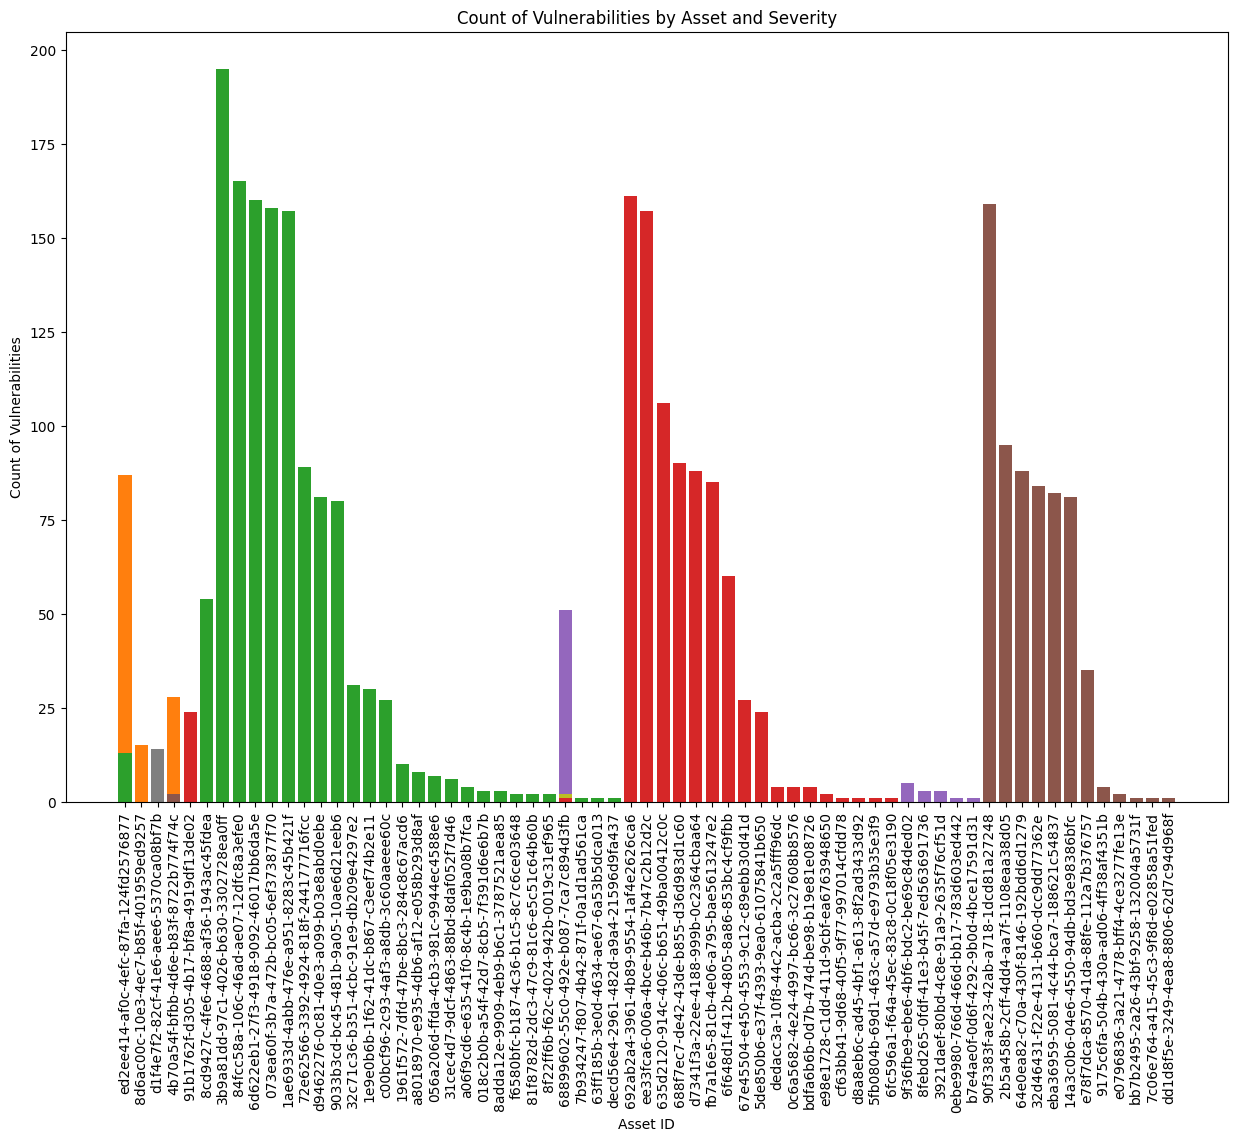

In [ ]:
import matplotlib.pyplot as plt

# Create a bar plot
plt.figure(figsize=(15, 10))
pandas_df = asset_vulns_ordered.toPandas()

for severity in pandas_df['vuln_severity'].unique():
    subset = pandas_df[pandas_df['vuln_severity'] == severity]
    plt.bar(subset['asset_id'], subset['count'], label=f'Severity: {severity}')

plt.xlabel('Asset ID')
plt.ylabel('Count of Vulnerabilities')
plt.title('Count of Vulnerabilities by Asset and Severity')
plt.xticks(rotation=90)
plt.show()
